In [1]:
# Python imports
import sys

# PyTorch imports
import torch
import torchvision

# Third-party imports
import matplotlib.pyplot as plt

# Own imports
import utils

# 0. Constants

In [2]:
BATCH_SIZE = 10
LEARNING_RATE = 0.001
EPOCHS = 10

# 1. Dataset

In [3]:
dataset_training = torchvision.datasets.MNIST('./data', download=True, train=True, transform=torchvision.transforms.ToTensor())
dataset_test = torchvision.datasets.MNIST('./data', download=True, train=False, transform=torchvision.transforms.ToTensor())

In [4]:
dataloader_training = torch.utils.data.DataLoader(dataset_training, batch_size=BATCH_SIZE, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=BATCH_SIZE, shuffle=True)

## 1.1. Dataset Properties

### 1.1.1. Length of Datasets

In [5]:
print(f'Length of training dataset: {len(dataset_training)}')
print(f'Length of test dataset: {len(dataset_test)}')

Length of training dataset: 60000
Length of test dataset: 10000


### 1.1.2. Value Range

In [6]:
image, _ = dataset_training[0]
print(f'Min value of images is {image.min()}')
print(f'Max value of images is {image.max()}')

Min value of images is 0.0
Max value of images is 1.0


### 1.1.3. Sample Plots

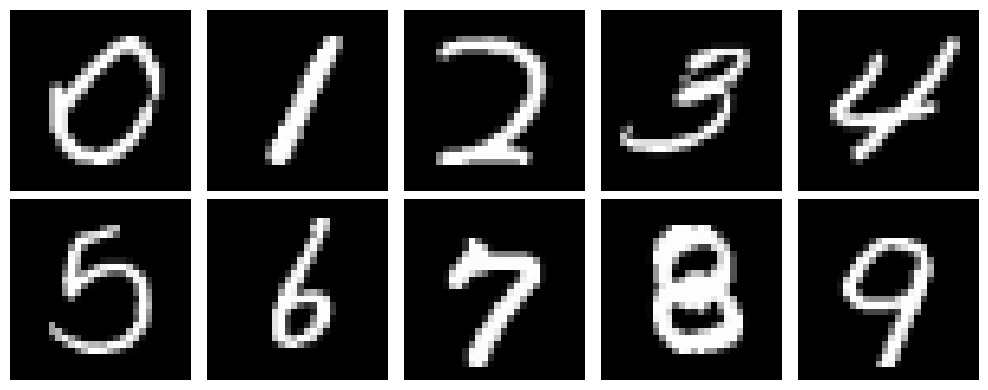

In [7]:
# Sample 10 images with labels 0 to 9.
samples = utils.sample_MNIST_with_all_labels(dataset_training)

# Plot the images with labels.
rows, cols = 2, 5
plt.figure(figsize=(10, 4))
for i in range(rows * cols):
    plt.subplot(rows, cols, i+1)
    plt.axis('off')
    plt.imshow(samples[i].squeeze(), cmap=plt.cm.gray)
plt.tight_layout()

# 2. Model

In [8]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 10),
    torch.nn.Softmax(dim=1)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
  (2): Softmax(dim=1)
)


# 3. Train

In [9]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), LEARNING_RATE)

for batch, [images, labels] in enumerate(dataloader_training):
    # Convert the labels to one-hot representation.
    labels = torch.nn.functional.one_hot(labels, num_classes=10).to(dtype=torch.float32)

    # make the prediction.
    pred = model(images)

    # Calculate the loss.
    loss = loss_fn(pred, labels)

    # Back propagation.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (batch + 1) % 1000 == 0:
        loss, size_current, size_total = loss.item(), (batch+1)*BATCH_SIZE, len(dataloader_training.dataset)
        print(f'loss: {loss:>7f} [{size_current:>6d}/{size_total:>6d}]')

loss: 2.293271 [ 10000/ 60000]
loss: 2.263621 [ 20000/ 60000]
loss: 2.249643 [ 30000/ 60000]
loss: 2.213624 [ 40000/ 60000]
loss: 2.126543 [ 50000/ 60000]
loss: 2.173880 [ 60000/ 60000]
